# Kamień milowy 2(Inżynieria cech, wstępne modelowanie)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
congressional_voting_df = pd.read_csv("congressional_voting_dataset.csv")

In [6]:
congressional_voting_df.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat


In [30]:
map = {"y": 1, "n" : 0, "?": np.nan, "democrat" : 1, "republican" : 0}

columns = congressional_voting_df.columns.to_list()
for column in columns:
    congressional_voting_df[column] = congressional_voting_df[column].map(map)

congressional_voting_df.head(5)

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


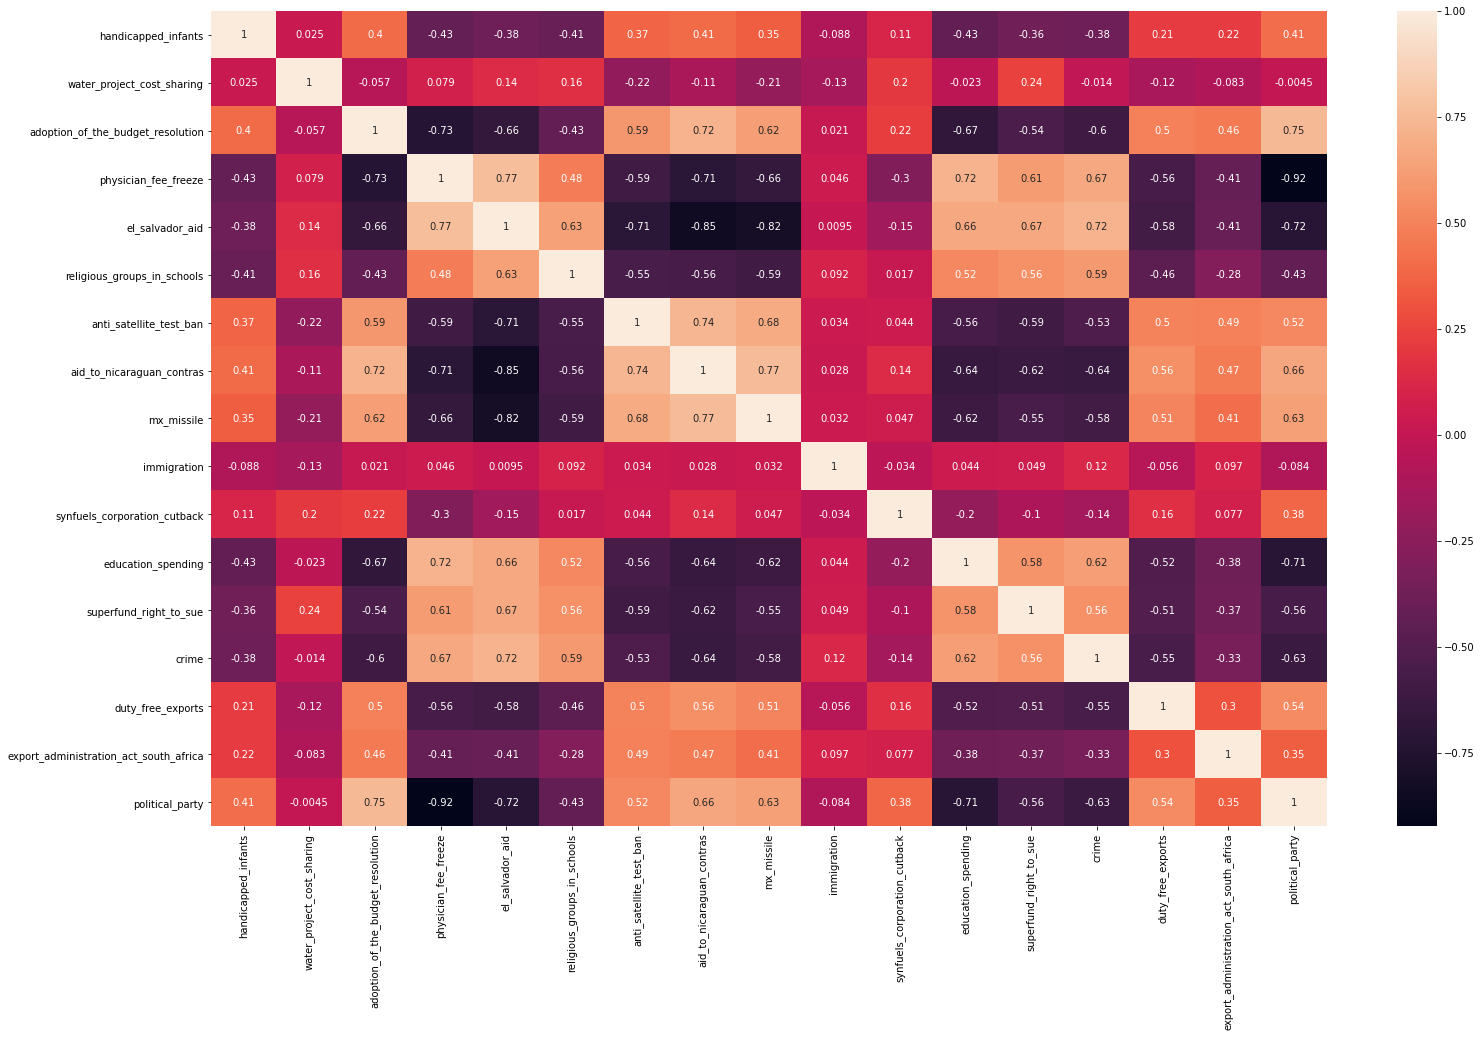

In [31]:
# Correlation matrix
plt.figure(figsize=(25,15))
corrMatrix = congressional_voting_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [32]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

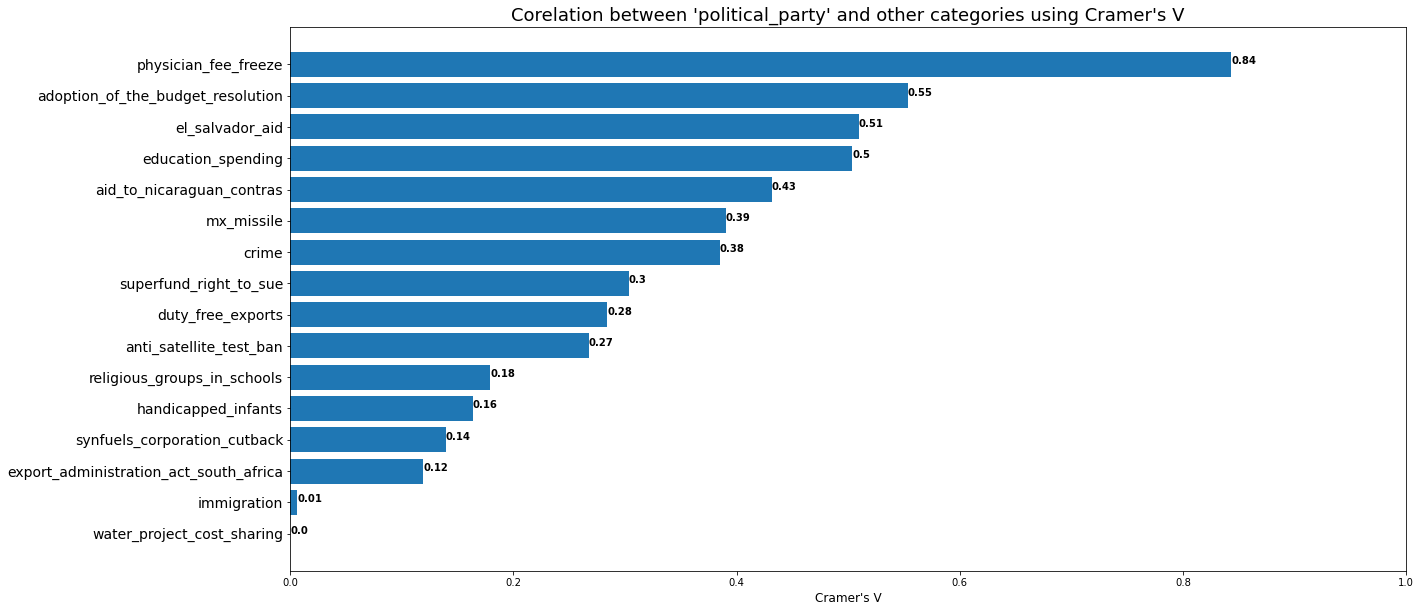

In [33]:
# Sprawdziliśmy równiez korelację z 'political party' używając współczynnika V Craméra

names = congressional_voting_df.columns.to_list()
names.remove("political_party")
height = [None] * len(names)
for i in range(len(names)): 
    height[i] = cramers_V(congressional_voting_df[names[i]], congressional_voting_df['political_party'])

barchart_df = pd.DataFrame(
{
    "names" : names, 
    "height" : height
})
barchart_df = barchart_df.sort_values('height')

plt.figure(figsize=(20,10))
plt.barh(barchart_df["names"], barchart_df["height"])
plt.title("Corelation between 'political_party' and other categories using Cramer's V", size = 18)
plt.xlim(0, 1)
plt.yticks(size = 14)
plt.xlabel("Cramer's V", size = 12)

for i, v in enumerate(barchart_df["height"]):
    plt.text(v , i, str(round(v, 2)), fontweight='bold')

plt.show()

Obie miary dają bardzo podobną kolejność. W obu przypadkach 'physician_fee' jest pierwsze, a za nim 'adoption_of_the_budget_resolution', 'el_salvador_aid', 'education_spending'. Na końcu natomiast jest 'water_project_cost_sharing', 'immigration'. 

In [34]:
congressional_voting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped_infants                     423 non-null    float64
 1   water_project_cost_sharing              387 non-null    float64
 2   adoption_of_the_budget_resolution       424 non-null    float64
 3   physician_fee_freeze                    424 non-null    float64
 4   el_salvador_aid                         420 non-null    float64
 5   religious_groups_in_schools             424 non-null    float64
 6   anti_satellite_test_ban                 421 non-null    float64
 7   aid_to_nicaraguan_contras               420 non-null    float64
 8   mx_missile                              413 non-null    float64
 9   immigration                             428 non-null    float64
 10  synfuels_corporation_cutback            414 non-null    float6

## Train test split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(congressional_voting_df.drop("political_party", axis=1), 
                                                    congressional_voting_df["political_party"], 
                                                    test_size=0.3, shuffle=True, random_state=42)

In [36]:
X_train.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
118,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
114,1.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
140,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
137,0.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
322,1.0,1.0,1.0,0.0,NaN,1.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN


## Imputation

In [37]:
## filling gaps using 'most frequent' strategy
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(X_train)

X_train = pd.DataFrame(imp.transform(X_train), columns = X_train.columns.to_list())
X_test = pd.DataFrame(imp.transform(X_test), columns = X_test.columns.to_list())

In [38]:
X_train.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


## Modelling

In [39]:
# Modele w dużym stopniu korzystają z korelacji 'political_party' z 'physician_fee_freeze'. 
# Dlatego patrzyliśmy jak radzą sobie modelę również bez tej zmiennej. 

#X_train = X_train.drop('physician_fee_freeze', axis='columns')
#X_test = X_test.drop('physician_fee_freeze', axis='columns')

### Decision tree

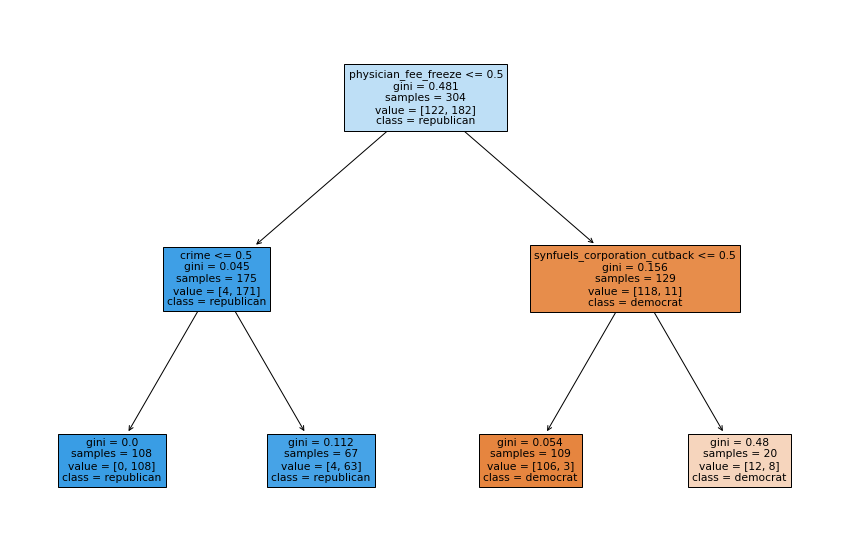

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(random_state=1234, max_depth=2)
model = dtc.fit(X_train, y_train)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtc, 
                   feature_names=X_train.columns.to_list(),  
                   class_names=["democrat", "republican"],
                   filled=True)

In [41]:
dtc.score(X_test, y_test)

0.9694656488549618

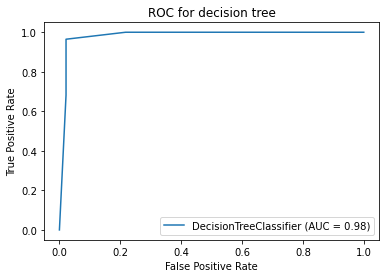

In [42]:
from sklearn import metrics

metrics.plot_roc_curve(dtc, X_test, y_test)
plt.title("ROC for decision tree")
plt.show()

### Logistic regression

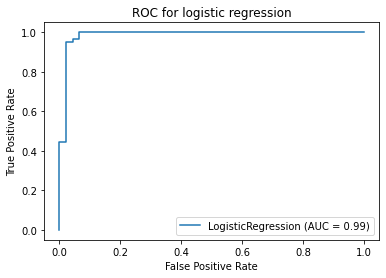

In [43]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)

metrics.plot_roc_curve(lg, X_test, y_test)
plt.title("ROC for logistic regression")
plt.show()

In [44]:
lg.score(X_test, y_test)

0.9618320610687023

### Random forest

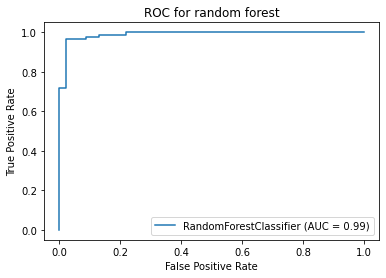

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

metrics.plot_roc_curve(rfc, X_test, y_test)
plt.title("ROC for random forest")
plt.show()

In [46]:
rfc.score(X_test, y_test)

0.9541984732824428

### Adaboost

In [47]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100, learning_rate = 0.5, random_state=0)
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=0)

In [48]:
abc.score(X_test, y_test)

0.9618320610687023

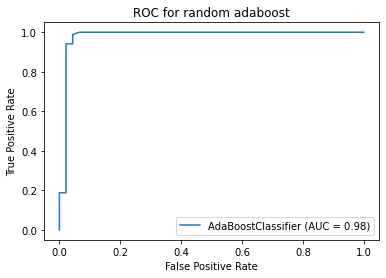

In [49]:
metrics.plot_roc_curve(abc, X_test, y_test)
plt.title("ROC for random adaboost")
plt.show()

### Summary(cross-validation)

In [50]:
from sklearn.model_selection import cross_val_score

# Decision tree¶
scores_dtc = cross_val_score(dtc, X_train, y_train, cv=5)
scores_dtc.mean()

0.9507103825136612

In [51]:
# Logistic regression
scores_lg = cross_val_score(lg, X_train, y_train, cv=5)
scores_lg.mean()

0.9638797814207649

In [52]:
# Random forest
scores_rfc = cross_val_score(rfc, X_train, y_train, cv=5)
scores_rfc.mean()

0.9440437158469945

In [53]:
# Adaboost
scores_abc = cross_val_score(abc, X_train, y_train, cv=5)
scores_abc.mean()

0.9540437158469945

Wszystkie modele dają bardzo dobre wyniki, ponieważ powyżej 0.94. Najlepsze wyniki ze wszyskich modeli daje jednak regresja logistyczna. Co ciekawe przy usunieciu zmiennej 'physician_fee_freeze' regresja logistyczna wciąż otrzymuje najlepszy rezultat. 